# Projekt iz SPI

## Checkpoint 1 za 09.03.2023:

Odabrati skup podataka i napraviti osnovnu analizu podataka u pythonu

Odabran skup podataka: **Avocado Prices 2020**

Link na dataset: https://www.kaggle.com/datasets/timmate/avocado-prices-2020

Osnovna analiza podataka:

- učitati iz csv u dataframe (pandas)
- pregled prvih 5 redaka
- veličina skupa
- nazivi stupaca
- broj nedostajućih vrijednosti po stupcu (.isna)
- jedinstvene vrijednosti (.unique())
- ispis tipova podataka (.dtypes)
- frekvencije vrijednosti po stupcu (petlja, data[column].value_counts())

Pitanja:

1. Da li je skup podataka dovoljno velik?
2. Da li skup ima dovoljno različite podatke?
3. Da li skup ima vremensku dimenziju?
4. Da li skup ima kvantitativne i kvalitativne podatke?
5. Da li skup ima puno nedostajućih vrijednosti?

Skup, rezultate analize i odgovore na pitanja kratko prezentirati (5 min.) na vježbama 09.03.

### Instalacija paketa

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# from sklearn import metrics # DEPRECATED
from collections import Counter

### Učitavanje dataseta u dataframe

In [2]:
df = pd.read_csv('avocado-updated-2020.csv')

### Pregled prvih 5 redaka

In [3]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


### Veličina skupa


In [4]:
num_rows, num_cols = df.shape

print(f'Skup podataka sadrži {num_rows} redaka i {num_cols} stupaca')

Skup podataka sadrži 33045 redaka i 13 stupaca


### Nazivi stupaca

In [5]:
cols = list(df.columns)
df.columns

Index(['date', 'average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'geography'],
      dtype='object')

### Broj nedostajućih vrijednosti po stupcu

In [6]:
empty_cells = df.isnull().sum()
empty_cells

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

### Jedinstvene vrijednosti

In [7]:
cols_uniques = {col: len(df[col].unique()) for col in cols}
cols_uniques

{'date': 306,
 'average_price': 260,
 'total_volume': 32901,
 '4046': 31628,
 '4225': 32286,
 '4770': 20761,
 'total_bags': 32752,
 'small_bags': 31938,
 'large_bags': 28389,
 'xlarge_bags': 11760,
 'type': 2,
 'year': 6,
 'geography': 54}

### Tipovi podataka

In [8]:
df.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

### Frekvencije vrijednosti po stupcu

In [9]:
for col in cols:
    print(df[col].value_counts())
    print()

2015-01-04    108
2018-11-04    108
2019-01-20    108
2019-01-13    108
2019-01-07    108
             ... 
2016-11-27    108
2020-11-29    108
2015-12-06    107
2017-06-18    107
2017-06-25    107
Name: date, Length: 306, dtype: int64

1.19    384
1.15    382
1.14    376
1.26    356
1.16    352
       ... 
0.44      1
0.46      1
3.12      1
2.68      1
0.50      1
Name: average_price, Length: 260, dtype: int64

32775.71      2
5341.14       2
5828.21       2
728998.69     2
6518.64       2
             ..
43540.93      1
1468901.87    1
7774.07       1
84144.99      1
24106.58      1
Name: total_volume, Length: 32901, dtype: int64

0.00         381
3.00          25
4.00          18
1.00          14
6.00           9
            ... 
116069.90      1
5025.90        1
571587.33      1
504.97         1
1236.96        1
Name: 4046, Length: 31628, dtype: int64

0.00         319
1.00          36
2.00          10
3.00          10
1.73           5
            ... 
62963.23       1
1093.69    

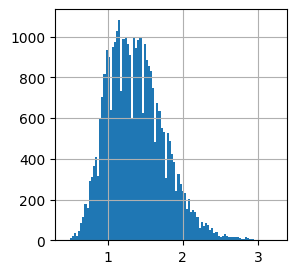

In [59]:
df['average_price'].hist(figsize=[3, 3], bins=100)
plt.show()

### Provjera

Potrebna provjera poklapaju li se godine u `date` stupcu s vrijednostima u `year` stupcu.

In [67]:
get_year = lambda date: int(date[:4])

years_match = all(get_year(date_) == year_
                  for date_, year_
                  in zip(df['date'], df['year']))
print('Godine se poklapaju!'
      if years_match else
      'Godine se poklapaju.')

Godine se poklapaju!


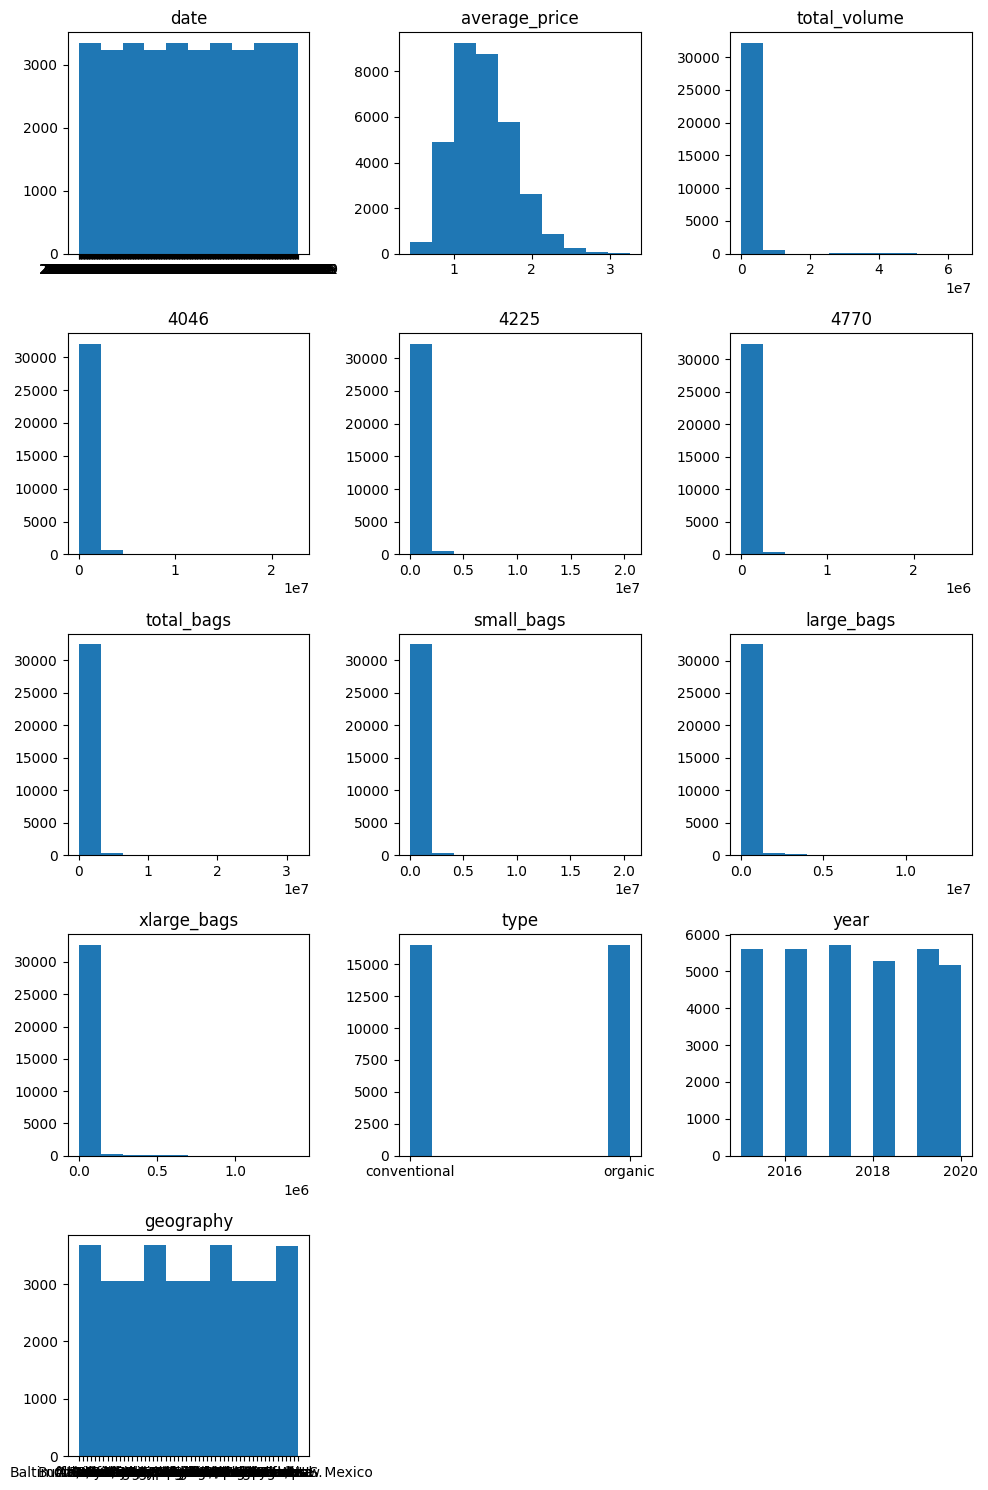

In [35]:
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 15))

# Flatten the axis array to make it easier to iterate
axs = axs.flatten()

# Loop through each column and plot the histogram on the corresponding subplot
for i, column in enumerate(df.columns):
    axs[i].hist(df[column])
    axs[i].set_title(column)

# Remove any unused subplots
for i in range(len(df.columns), n_rows * n_cols):
     fig.delaxes(axs[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

### Pitanja

1. [x] Da li je skup podataka dovoljno velik?

- Sadrži `33045` redaka i `13` stupaca. Dovoljno je.

2. [x] Da li skup ima dovoljno različite podatke?

- Ima 13 stupaca i tipovi podataka su: `float64`, `int64` i `object` tj. string i datum. Ima dovoljno različite podatke.

3. [x] Da li skup ima vremensku dimenziju?

- Da. Ima datum.

4. [x] Da li skup ima kvantitativne i kvalitativne podatke?

- Skup ima kvalitativne od kojih su `geography` tj. nazivi države i `type` ( i kvantitativne (svi ostali stupci) podatke.

5. [ ] Da li skup ima puno nedostajućih vrijednosti?

- Uopće nema nedostajuće vrijednosti. Sve čelije su popunjene.
